In [18]:
import os
import sys
import numpy as np
import pandas as pd
import math
#sys.path.insert(0, os.path.abspath('../data/h5/d2021219/'))
import h5py

In [19]:

filename = "../data/h5/d2021219/D2021219000.hdf5"
filename = '../data/ESF2021218/d2021219/D2021219000.hdf5'
#filename = "../data/D2021321000.hdf5"
#filename = "../data/D2021322000.hdf5"
filename = "../data/D2021325000.hdf5"
#filename = "../data/D2021326000.hdf5"

f = h5py.File(filename, "r")
# List all groups
print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]
    
# Get the data
data = f['Data']
meta = f['Metadata']

Keys: <KeysViewHDF5 ['Data', 'Metadata']>


In [20]:
data.keys()

<KeysViewHDF5 ['data_snr', 'utctime']>

In [21]:
meta.keys()

<KeysViewHDF5 ['azimuthList', 'channelList', 'codeList', 'elevationList', 'heightList', 'ippSeconds', 'nCohInt', 'nFFTPoints', 'nIncohInt', 'nProfiles', 'timeZone', 'type']>

In [22]:
list(meta['azimuthList'])

[-95.25, -96.53, -97.69, -99.5, -108.44, 102.54, 93.19, 90.0, 90.0, 88.89]

In [23]:
#data['utctime']
np.sin(np.radians(190-90))

0.984807753012208

In [24]:
snr = data['data_snr']
snr.keys()

<KeysViewHDF5 ['channel00', 'channel01', 'channel02', 'channel03', 'channel04', 'channel05', 'channel06', 'channel07', 'channel08', 'channel09']>

In [25]:
ch0 = snr['channel00']
ch0

<HDF5 dataset "channel00": shape (300, 600), type "<f8">

In [26]:
n_ch = len(list(snr.keys()))
w_ch = 100
h0 = 0 #altura inicial a tomar
n_h = len(snr['channel00'][0,h0:])
blocks= len(snr['channel00'][:,0])
print("Blocks: ", blocks,snr['channel00'][0,:].shape)

Blocks:  300 (600,)


In [27]:
list(snr.keys())

['channel00',
 'channel01',
 'channel02',
 'channel03',
 'channel04',
 'channel05',
 'channel06',
 'channel07',
 'channel08',
 'channel09']

In [28]:
import matplotlib.pyplot as plt
import time
from matplotlib.colors import LogNorm
from IPython import display


In [29]:
import datetime
TIME_FORMAT='%Y-%m-%d %H:%M:%S'
times = data['utctime']
#print(list(times))
dates =[datetime.datetime.utcfromtimestamp(utc_time) for utc_time in  list(data['utctime'])]
str_dates_local = [(date-datetime.timedelta(hours=5)).strftime(TIME_FORMAT)  for date in dates]


In [30]:
def poyect_range(zenith, max_alt):
    if zenith == 90:
        zenith = 89.99999
    if zenith == -90:
        zenith = -89.99999
    dist = max_alt* math.tan(math.radians(zenith))
    return dist

[30.54, 24.17, 16.150000000000006, 9.730000000000004, 3.3700000000000045, 4.920000000000002, 9.620000000000005, 16.0, 24.0, 28.810000000000002]
(1200,) (600,) 1200 -4837972529.651978 4837972529.651978


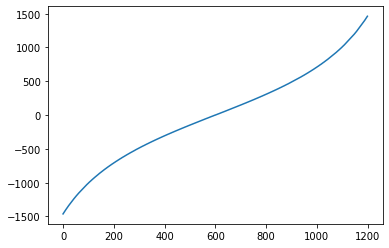

In [31]:
x = np.array(list(meta['heightList']))[h0:]  # alturas
alts = x.copy()
max_alt = np.amax(x)
total_alt = x[-1]-x[0] #todo el rango incluyendo la altura "negativa"
znth = [90-e for e in meta['elevationList']]
elev = list(meta['elevationList'])
azi = list(meta['azimuthList'])
sgn = np.sign(azi)
#print(sgn)

elev_sgn =elev* sgn
print(znth)
znth_s = znth*sgn
#print(elev)
azi =list(meta['azimuthList'])
sgn = np.sign(azi)
phi = np.radians(elev)


#print(th_sgn)
min_d = poyect_range(-90,max_alt)  #todo el rango
max_d = poyect_range(90,max_alt)
steps = 2*len(alts)


angles = np.linspace(-60,60,steps)
#print(angles)
numElems = 7
list_range = np.asarray([int(poyect_range(ang,max_alt)) for ang in angles])
idx = np.round(np.linspace(0, len(list_range) - 1, numElems)).astype(int)
print(list_range.shape, x.shape, steps, min_d, max_d)
y = list_range
#print(list_range)
plt.plot(list_range)

In [32]:
maxdB = 20
mindB = 0
points_cb = 200 #puntos de la barra de colores

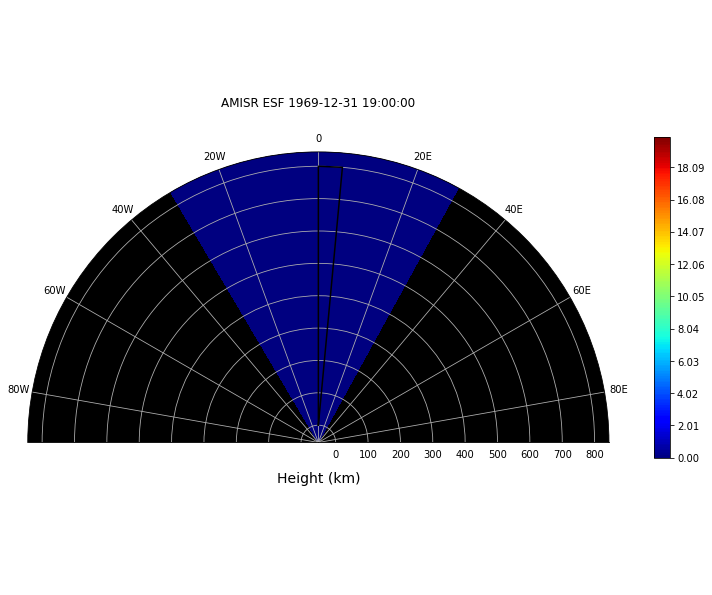

/home/soporte/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator


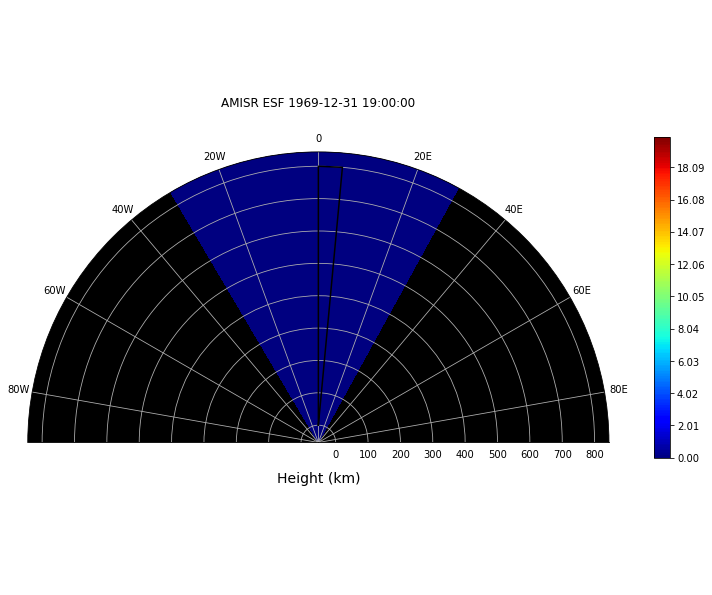

In [33]:
from matplotlib import ticker
import matplotlib.ticker as mticker

#data_ch = snr['ch']
#['channel00', 'channel01']
plt.ion()


fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
fig.set_size_inches(10, 10)
hdisplay = display.display("", display_id=True)
ax.set_facecolor("black")

#multiplicado por el signo del azimuth invertido, esto para acomodar de oeste a este
r, theta = np.meshgrid(alts, np.radians(znth*np.negative(sgn)) )
mylevs_cbar = list(np.linspace(mindB,maxdB,points_cb)) #niveles de la barra de colores
#print(mylevs_cbar)
n_fig=1
#print(Y)
color_bar_flag = False
off = 0

for block in range(blocks):
    ax.clear()
    dat_channels=[]
    for key in list(snr.keys()):
        dat_channels.append(snr[key][block+off,h0:].squeeze())
    _data = np.array(dat_channels)

    z = _data.copy()
    #print(z.shape,theta.shape,r.shape) #z = (10, 600) theta = (10, 600) r = (10, 600)
    #print(z[:,300])
    z[z > maxdB]=maxdB
    ax.set_xlim(-np.pi/2,np.pi/2)
    #im = ax.contourf(theta, r, z, 10,cmap ='jet',locator=ticker.LogLocator(numticks=10))#, vmin = 170, vmax = 280)
    im = ax.contourf(theta, r, z, points_cb, cmap='jet', vmin=mindB, vmax=maxdB, levels=mylevs_cbar)
    #im = ax.pcolormesh(theta, r, z, cmap ='jet', vmin=mindB, vmax=maxdB)


    #lb_rg = ax.set_xlabel("Range W-E (km)")
    x_label = ax.set_xlabel("Height (km)", fontsize = 14)
    
    ax.xaxis.set_label_coords(0.5, 0.2) #0 a 1 relativo a la figura
    
    ax.set_title("AMISR ESF {}".format(str_dates_local[block+off]), pad=-100)  

    ax.set_theta_zero_location("N")
    ax.set_xticklabels(['', '80E', '60E', '40E', '20E', '0', '20W', '40W', '60W', '80W',''])
    
    ax.set_rmax(800)
    ax.set_rmin(0)
    #ax.set_rgrids([100,200,300,400,500,600,700,800], angle=150.)
    
    ''' 
    ax2 = ax.secondary_xaxis(0.8) #0 a 1, relativo a la figura
    #ax2.set_xlim
    ticks = ax2.get_xticks().tolist()
    #print(ticks) 
    range_labels = list_range[idx].tolist()
    range_labels.insert(0,"")
    #print(range_labels)
    ax2.set_xticklabels(range_labels)
    #print(ax2.get_xticklabels())
    '''    
    
    if not color_bar_flag:
        #no funciona el dividir ax, lo siguiente da resultados:
        fig.colorbar(im, orientation="vertical", fraction=0.025, pad=0.07)
        color_bar_flag = True
    plt.tight_layout()
    #ax.set_ylim(0,600) #Recortar alturas!!!!!!!!!!!!!!!!!!!!!!
    #ax.set_ylim(100,600)
    #print(ax.get_xlim())
    
    coord = [[0,0], [0,800], [-((5/180)*3.14),800],[0,0]]
    xs, ys = zip(*coord) #create lists of x and y values
    plt.plot(xs,ys,color="black") 
    
    
    hdisplay.update(fig)
    
    fig.savefig('../out_figs/{}.png'.format(n_fig))
    n_fig +=1
    
    time.sleep(0.5)
    #plt.show()


In [34]:
#fill_matrix_test(plot_matrix,pos_list)